In [1]:
#importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree,export_graphviz
from sklearn.metrics import accuracy_score



In [2]:
datos =pd.read_csv("./wine.data",sep=",")

In [3]:
datos.head()

,clase,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
datos.describe()

,clase,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


(array([59.,  0.,  0.,  0.,  0., 71.,  0.,  0.,  0., 48.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

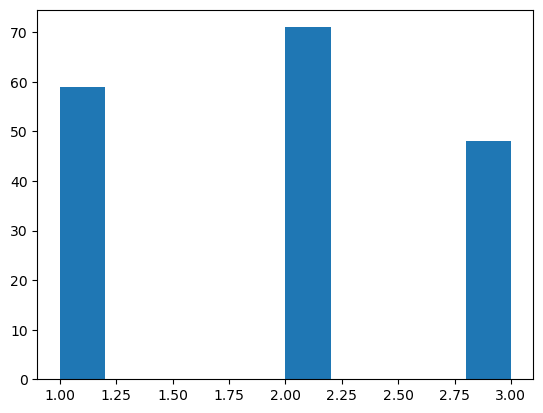

In [5]:
#valriable objetivo
plt.hist(datos.clase)

In [39]:
# Predictores
predictors_col = [
    "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium",
    "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins",
    "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"
]

In [40]:
# Variable objetivo
target_col = ['clase']

In [41]:
predictors = datos[predictors_col]
target = datos[target_col]

In [42]:
X_train, X_test, y_train, y_test = train_test_split(
    predictors, target, test_size=0.2, random_state=13
)

In [44]:
tree = DecisionTreeClassifier()

In [43]:
# Entrenamos el árbol
arbol = tree.fit(X_train, y_train)

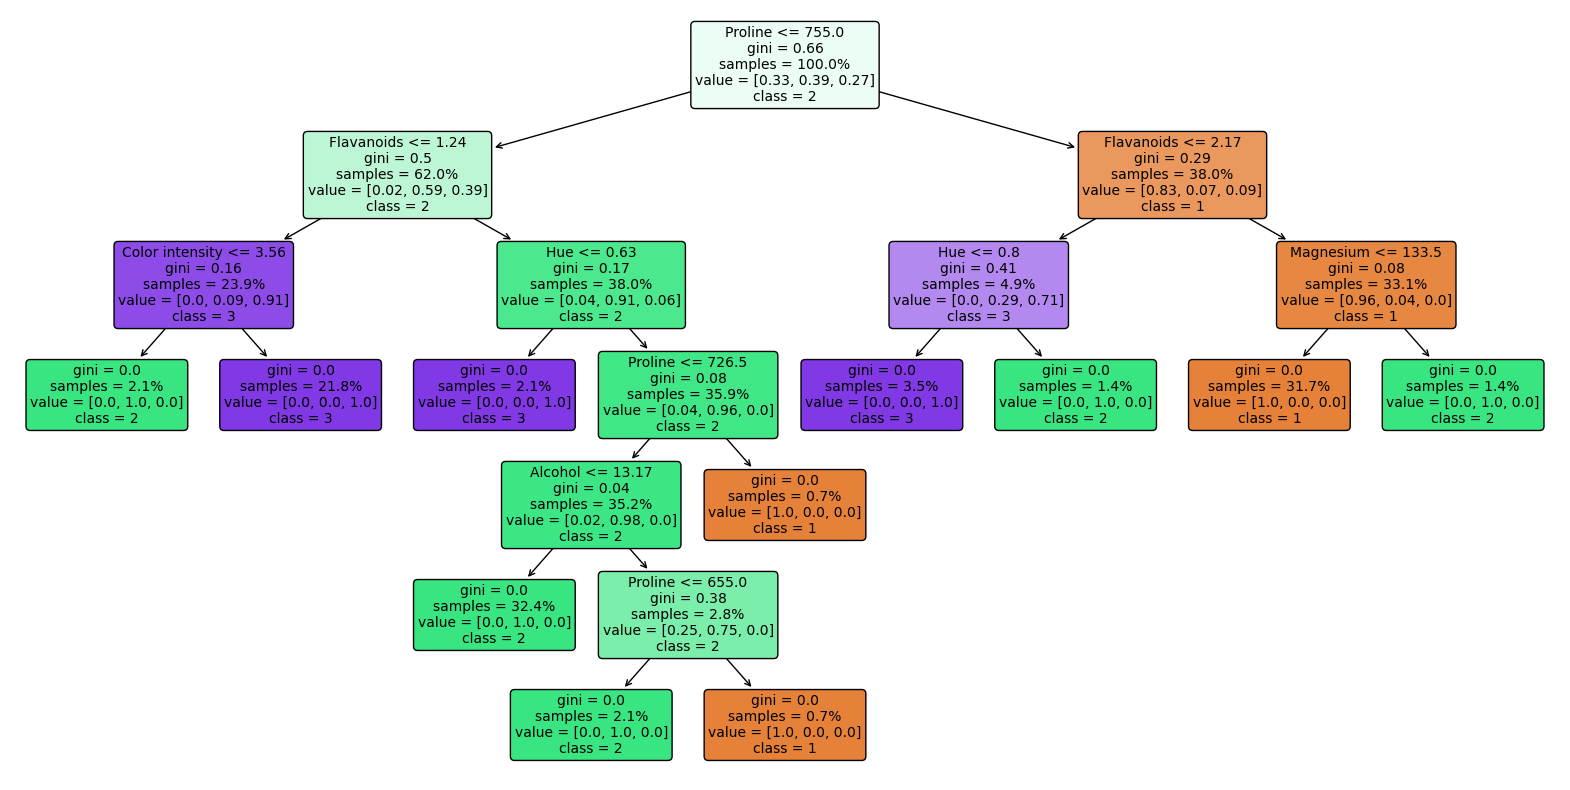

In [52]:
#Configuración de la visualización del árbol
plt.figure(figsize=(20, 10))  # Tamaño de la figura
plot_tree(
    arbol,
    feature_names=predictors_col,
    class_names=[str(i) for i in range(1, 4)],  # Nombres de las clases
    filled=True,  # Rellenar nodos con colores
    rounded=True,  # Esquinas redondeadas
    proportion=True,  # Mostrar proporciones en las hojas
    precision=2,  # Precisión de los números
    fontsize=10,  # Tamaño de la fuente
)

plt.show()

In [54]:
# Calcular las predicciones en los datos de prueba
y_pred = arbol.predict(X_test)


In [55]:
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)

# Mostrar la precisión
print("Accuracy:", accuracy)

Accuracy: 0.9166666666666666
